## Pandas dataframes
An overview of the core functionality

In [21]:
# Open the database
import pandas as pd

vstar = pd.read_csv('vsx.csv')


In [22]:
# Number of rows
len(vstar)

451272

In [23]:
# Show the first 10 rows
vstar.head(10)

,iod,name,code,type,mag_min,mag_max,period,ra,dec
0,270915,VSX J000000.6+620044,0,SR,12.300,12.550,68.000000,0.00271,62.01222
1,195,GM And,0,RRAB,12.430,13.300,0.706758,0.01521,35.36286
2,287959,CSS_J000004.0+182425,0,RRAB,15.171,0.970,0.485160,0.01669,18.40698
3,275753,Mis V1378,0,SR,11.400,12.700,NaN,0.01717,57.10467
4,170899,UNSW-V 312,0,EA,13.630,0.066,1.057620,0.02500,-59.74675
5,64625,V0467 And,0,EW,15.210,15.610,0.353539,0.02721,35.36692
6,25131,Z Peg,0,M,7.300,13.600,320.000000,0.02733,25.88647
7,251805,V1023 Cas,0,RRAB,18.130,18.750,0.643700,0.02771,56.65331
8,25281,EP Peg,0,SR,10.700,11.400,340.000000,0.02875,20.23736
9,25257,DM Peg,0,EA/D:,10.800,11.600,2.588991,0.03037,18.73808


In [24]:
# Extract one column
vstar.mag_max


0         12.550
1         13.300
2          0.970
3         12.700
4          0.066
           ...  
451267    15.830
451268    12.250
451269     0.004
451270    17.000
451271       NaN
Name: mag_max, Length: 451272, dtype: float64

In [25]:
# Get one row
vstar.iloc[6]

# or 

vstar[vstar.name == 'Z Peg']



,iod,name,code,type,mag_min,mag_max,period,ra,dec
6,25131,Z Peg,0,M,7.3,13.6,320.0,0.02733,25.88647


In [26]:
vstar = vstar.drop(columns=['code', 'iod', 'ra'])
vstar.head(10)

,name,type,mag_min,mag_max,period,dec
0,VSX J000000.6+620044,SR,12.300,12.550,68.000000,62.01222
1,GM And,RRAB,12.430,13.300,0.706758,35.36286
2,CSS_J000004.0+182425,RRAB,15.171,0.970,0.485160,18.40698
3,Mis V1378,SR,11.400,12.700,NaN,57.10467
4,UNSW-V 312,EA,13.630,0.066,1.057620,-59.74675
5,V0467 And,EW,15.210,15.610,0.353539,35.36692
6,Z Peg,M,7.300,13.600,320.000000,25.88647
7,V1023 Cas,RRAB,18.130,18.750,0.643700,56.65331
8,EP Peg,SR,10.700,11.400,340.000000,20.23736
9,DM Peg,EA/D:,10.800,11.600,2.588991,18.73808


In [27]:
# How many stars of each type?

vstar.type
vstar.type.value_counts().head(10)

VAR     65677
EW      53229
RRAB    50043
ROT     41104
SR      38206
MISC    27823
EA      22521
M       17983
RRC     15477
E        9956
Name: type, dtype: int64

In [28]:
# Add an amplitude column: (brightest range)
vstar['amplitude'] = vstar.mag_max - vstar.mag_min

# Discard the negative amplitudes (The data is formatted differently)
vstar = vstar[vstar.amplitude > 0]

In [29]:
# Drop any missing values
vstar = vstar.dropna()

# Filter for M-type variables
miras = vstar[vstar.type == 'M']
miras.head(10)
len(miras)

11049

In [30]:
miras.describe()

,mag_min,mag_max,period,dec,amplitude
count,11049.000000,11049.000000,11049.000000,11049.000000,11049.000000
mean,12.227227,15.588874,305.924404,-19.270900,3.361647
std,2.049992,2.051315,98.413172,30.089179,1.436329
min,0.900000,3.100000,58.200000,-88.270190,0.070000
25%,11.200000,14.600000,235.500000,-33.708080,2.400000
50%,12.300000,15.700000,294.000000,-27.674060,3.200000
75%,13.500000,16.800000,364.500000,-7.928030,4.200000
max,19.172000,22.000000,948.000000,88.274390,10.900000


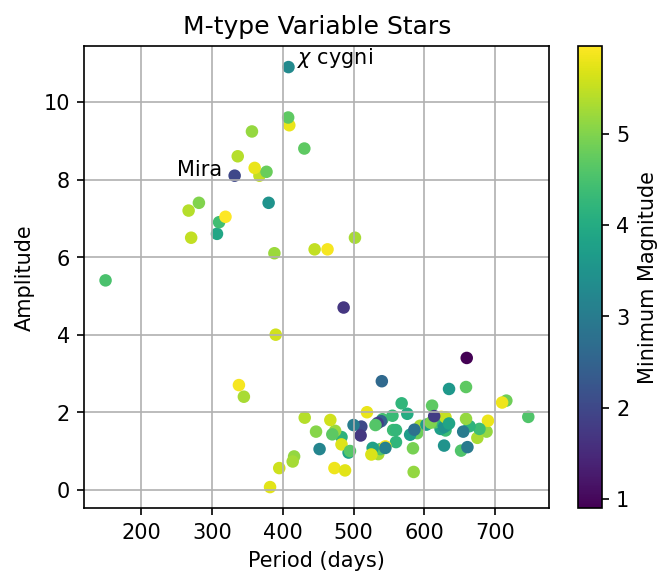

In [31]:

# Period vs. Amplitude in MIRA-type variable stars

# Let's focus on MIRAs that we might sometimes observe with the
# un-aided eye - that is, their minimum magnitude (brightest)
# is less than magnitude 6.

miras = miras[miras.mag_min < 6.0]

import matplotlib.pyplot as plt

plt.figure(figsize=(5,4), dpi=150)
plt.grid()
plt.scatter(miras.period, miras.amplitude, marker='.', s=100, c=miras.mag_min)
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('M-type Variable Stars')
plt.text(420,11, '$\chi$ cygni')
plt.text(250,8.1, 'Mira')
plt.colorbar(label='Minimum Magnitude')
plt.show()

In [32]:
miras[miras.amplitude > 10]

,name,type,mag_min,mag_max,period,dec,amplitude
402961,khi Cyg,M,3.3,14.2,408.05,32.91406,10.9


In [33]:
miras[miras.period>700]
miras[miras.period<200]

,name,type,mag_min,mag_max,period,dec,amplitude
105266,S Car,M,4.5,9.9,149.49,-61.549,5.4


In [34]:
# variable stars YOU could monitor (sometimes) with your naked eye!

vstar[(vstar.dec > -10) & (vstar.mag_min < 4) & (vstar.amplitude>3) & (vstar.type == 'M')].sort_values(['mag_min'])

,name,type,mag_min,mag_max,period,dec,amplitude
6106,WX Psc,M,0.9,4.3,660.00,12.59800,3.4
448104,IZ Peg,M,1.7,6.4,486.00,10.91039,4.7
12453,omi Cet,M,2.0,10.1,331.96,-2.97764,8.1
402961,khi Cyg,M,3.3,14.2,408.05,32.91406,10.9


In [35]:
vstar.amplitude.min()

0.0030000000000001137